<a href="https://colab.research.google.com/github/woojin-devv/final_project/blob/main/Image_Train_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="90xz5xcoxb7aCA9EZTkC")
project = rf.workspace("yoon-pvmwt").project("opensource_final_yoon")
version = project.version(5)
dataset = version.download("yolov8")  # 폴더 생성됨


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to opensource_final_yoon-5 in yolov8:: 100%|██████████| 6832/6832 [00:03<00:00, 1917.68it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from ultralytics import YOLO
import os

DATA_YAML_PATH = os.path.join(dataset.location, "data.yaml")
model = YOLO("yolov8n.pt")

model.train(
    data=DATA_YAML_PATH,
    epochs=100,
    batch=16,
    imgsz=640,
    name="yolov8n_food_v5_colab"
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 74.9MB/s]


Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/opensource_final_yoon-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_food_v5_colab, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

100%|██████████| 755k/755k [00:00<00:00, 16.1MB/s]

Overriding model.yaml nc=80 with nc=19

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 833.5±515.7 MB/s, size: 53.1 KB)


train: Scanning /content/opensource_final_yoon-5/train/labels... 2808 images, 142 backgrounds, 0 corrupt: 100%|██████████| 2808/2808 [00:01<00:00, 2405.98it/s]

train: New cache created: /content/opensource_final_yoon-5/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 846.4±381.9 MB/s, size: 61.3 KB)


val: Scanning /content/opensource_final_yoon-5/valid/labels... 402 images, 23 backgrounds, 0 corrupt: 100%|██████████| 402/402 [00:00<00:00, 1141.98it/s]

val: New cache created: /content/opensource_final_yoon-5/valid/labels.cache


Plotting labels to runs/detect/yolov8n_food_v5_colab/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000435, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_food_v5_colab
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.11G       0.88      3.785      1.462         20        640: 100%|██████████| 176/176 [00:56<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.58it/s]

                   all        402        379       0.26      0.456      0.272      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.58G     0.8901      2.756      1.451         21        640: 100%|██████████| 176/176 [00:54<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.87it/s]


                   all        402        379      0.491      0.552      0.546      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.61G     0.8945      2.324      1.447         20        640: 100%|██████████| 176/176 [00:50<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]


                   all        402        379      0.499      0.555      0.554      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.62G     0.8729      2.089      1.414         19        640: 100%|██████████| 176/176 [00:46<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]

                   all        402        379       0.57        0.7      0.652      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.64G     0.8527       1.89      1.386         19        640: 100%|██████████| 176/176 [00:47<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]

                   all        402        379      0.725      0.658      0.734      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.66G     0.8427      1.747      1.385         20        640: 100%|██████████| 176/176 [00:47<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]


                   all        402        379       0.72      0.638      0.698      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.67G     0.8148      1.609      1.357         20        640: 100%|██████████| 176/176 [00:47<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]

                   all        402        379      0.748      0.741      0.775      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.69G     0.8078      1.534      1.349         23        640: 100%|██████████| 176/176 [00:47<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]

                   all        402        379      0.791      0.686      0.781      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.71G     0.7778      1.417      1.326         17        640: 100%|██████████| 176/176 [00:46<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        402        379      0.718      0.745      0.761      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.73G     0.7582      1.397      1.312         21        640: 100%|██████████| 176/176 [00:47<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.08it/s]

                   all        402        379      0.745      0.745       0.79      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.74G     0.7606      1.341      1.312         20        640: 100%|██████████| 176/176 [00:45<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.91it/s]

                   all        402        379      0.728       0.75      0.799      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.76G     0.7458       1.28      1.297         18        640: 100%|██████████| 176/176 [00:46<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.96it/s]

                   all        402        379      0.702      0.769      0.797      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.78G     0.7454       1.25      1.294         20        640: 100%|██████████| 176/176 [00:47<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.21it/s]

                   all        402        379      0.778      0.725      0.786      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.79G     0.7163      1.214      1.279         14        640: 100%|██████████| 176/176 [00:47<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        402        379      0.809      0.764      0.828      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.81G     0.7007      1.175      1.266         17        640: 100%|██████████| 176/176 [00:46<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]

                   all        402        379      0.797       0.79      0.828       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.83G     0.6994      1.132       1.27         16        640: 100%|██████████| 176/176 [00:46<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]

                   all        402        379      0.802      0.749       0.83      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.85G     0.6915      1.092      1.261         17        640: 100%|██████████| 176/176 [00:47<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.96it/s]

                   all        402        379      0.816      0.772      0.836      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.86G      0.688      1.045      1.247         19        640: 100%|██████████| 176/176 [00:47<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]

                   all        402        379      0.828      0.776      0.828      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.88G     0.6682      1.036      1.245         18        640: 100%|██████████| 176/176 [00:46<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        402        379      0.772      0.772      0.816      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.9G     0.6809      1.009       1.25         17        640: 100%|██████████| 176/176 [00:45<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]

                   all        402        379      0.811      0.776      0.837       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.91G     0.6646     0.9975      1.237         17        640: 100%|██████████| 176/176 [00:46<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]

                   all        402        379      0.827      0.755      0.841      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.93G     0.6385     0.9895      1.219         24        640: 100%|██████████| 176/176 [00:46<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]

                   all        402        379      0.832      0.754      0.814       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.95G     0.6409     0.9293      1.221         20        640: 100%|██████████| 176/176 [00:46<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]

                   all        402        379      0.807      0.791      0.834       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.96G     0.6415     0.9215       1.22         22        640: 100%|██████████| 176/176 [00:46<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]

                   all        402        379      0.762      0.797      0.828      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.98G     0.6357     0.9158      1.215         18        640: 100%|██████████| 176/176 [00:46<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]

                   all        402        379      0.825      0.736       0.83      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         3G     0.6236     0.8648      1.205         16        640: 100%|██████████| 176/176 [00:45<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]

                   all        402        379       0.83       0.78      0.848      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.02G     0.6257     0.8642      1.203         25        640: 100%|██████████| 176/176 [00:45<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.14it/s]

                   all        402        379      0.804      0.786      0.825      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.04G     0.6142     0.8335        1.2         16        640: 100%|██████████| 176/176 [00:45<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]

                   all        402        379      0.849      0.774      0.841      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.05G     0.6112     0.8239      1.192         16        640: 100%|██████████| 176/176 [00:45<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]


                   all        402        379      0.851      0.811      0.864       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.07G     0.6098      0.834      1.193         28        640: 100%|██████████| 176/176 [00:45<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.83it/s]

                   all        402        379       0.82      0.777      0.833      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.08G     0.6123      0.821      1.189         22        640: 100%|██████████| 176/176 [00:46<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.26it/s]


                   all        402        379      0.842      0.793      0.849      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       3.1G     0.6094     0.8242      1.187         19        640: 100%|██████████| 176/176 [00:45<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.16it/s]

                   all        402        379      0.817      0.805      0.843      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.12G     0.5787     0.7835       1.17         17        640: 100%|██████████| 176/176 [00:45<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]

                   all        402        379      0.825      0.815      0.861      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.14G     0.5816     0.7714      1.179         21        640: 100%|██████████| 176/176 [00:46<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.35it/s]

                   all        402        379      0.857      0.823       0.87      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.15G     0.5844     0.7543      1.174         20        640: 100%|██████████| 176/176 [00:46<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]

                   all        402        379      0.809      0.841       0.87       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.17G     0.5662     0.7324      1.161         25        640: 100%|██████████| 176/176 [00:46<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.14it/s]

                   all        402        379      0.857       0.83      0.866      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.19G     0.5602     0.7243       1.15         21        640: 100%|██████████| 176/176 [00:46<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.14it/s]

                   all        402        379      0.841      0.806      0.866      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       3.2G     0.5681      0.741      1.159         23        640: 100%|██████████| 176/176 [00:46<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.21it/s]

                   all        402        379      0.817      0.795      0.852      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.22G     0.5736     0.7049      1.165         19        640: 100%|██████████| 176/176 [00:45<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]

                   all        402        379      0.848      0.834      0.878      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.24G     0.5652     0.7335       1.16         18        640: 100%|██████████| 176/176 [00:45<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.25it/s]

                   all        402        379      0.849      0.792      0.846      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.26G     0.5548     0.7054      1.154         24        640: 100%|██████████| 176/176 [00:45<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]

                   all        402        379      0.813      0.847      0.867      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.27G     0.5572     0.7099      1.159         21        640: 100%|██████████| 176/176 [00:45<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]


                   all        402        379      0.844      0.815      0.868      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.29G     0.5594     0.6776      1.149         20        640: 100%|██████████| 176/176 [00:45<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]

                   all        402        379      0.856      0.789      0.877      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.31G     0.5412     0.6725      1.144         22        640: 100%|██████████| 176/176 [00:45<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]

                   all        402        379      0.824      0.836      0.867      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.32G     0.5545     0.6687      1.153         22        640: 100%|██████████| 176/176 [00:45<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.17it/s]

                   all        402        379      0.836      0.858      0.872      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.34G     0.5432     0.6382      1.142         22        640: 100%|██████████| 176/176 [00:46<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.32it/s]

                   all        402        379      0.851      0.829      0.877      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.36G     0.5363      0.658       1.14         22        640: 100%|██████████| 176/176 [00:45<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]

                   all        402        379      0.847      0.803       0.86      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.38G     0.5335      0.659      1.135         19        640: 100%|██████████| 176/176 [00:46<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.13it/s]

                   all        402        379      0.839      0.823       0.87        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.39G     0.5193      0.627      1.129         18        640: 100%|██████████| 176/176 [00:45<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.76it/s]

                   all        402        379      0.844      0.848      0.878      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.41G     0.5213     0.6312      1.125         24        640: 100%|██████████| 176/176 [00:45<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]

                   all        402        379      0.833      0.848      0.868      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.43G     0.5248     0.6333       1.13         19        640: 100%|██████████| 176/176 [00:44<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]

                   all        402        379      0.892      0.802      0.879      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.44G     0.5159     0.6148      1.122         21        640: 100%|██████████| 176/176 [00:45<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.53it/s]

                   all        402        379      0.837      0.834      0.863      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.46G     0.5097     0.6165      1.121         16        640: 100%|██████████| 176/176 [00:45<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.72it/s]

                   all        402        379      0.821      0.824      0.871      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.48G     0.5125     0.6045      1.118         23        640: 100%|██████████| 176/176 [00:45<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]

                   all        402        379      0.869      0.822      0.864      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.49G      0.496     0.5925      1.112         16        640: 100%|██████████| 176/176 [00:46<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]

                   all        402        379      0.828      0.828      0.863      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.51G     0.5073        0.6      1.115         21        640: 100%|██████████| 176/176 [00:47<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]

                   all        402        379      0.844      0.843      0.874      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.53G     0.5042     0.5715      1.112         21        640: 100%|██████████| 176/176 [00:46<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        402        379      0.864       0.83       0.87      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.55G     0.4998     0.5851      1.113         18        640: 100%|██████████| 176/176 [00:46<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.21it/s]

                   all        402        379      0.854      0.838      0.879      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.57G     0.4922     0.5637      1.106         12        640: 100%|██████████| 176/176 [00:46<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.14it/s]

                   all        402        379      0.807      0.853      0.874      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.58G     0.4898     0.5444      1.106         20        640: 100%|██████████| 176/176 [00:46<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        402        379      0.849      0.812      0.859      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       3.6G     0.4896     0.5727      1.108         20        640: 100%|██████████| 176/176 [00:46<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.31it/s]

                   all        402        379      0.854      0.822      0.857      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.62G     0.4862     0.5544      1.099         21        640: 100%|██████████| 176/176 [00:47<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.23it/s]

                   all        402        379      0.883      0.811      0.872      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.63G     0.4828     0.5416      1.096         21        640: 100%|██████████| 176/176 [00:46<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.97it/s]

                   all        402        379      0.863      0.813       0.87      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.65G     0.4826      0.549      1.097         21        640: 100%|██████████| 176/176 [00:47<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.14it/s]


                   all        402        379      0.851      0.839      0.874      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.67G     0.4786     0.5421      1.091         18        640: 100%|██████████| 176/176 [00:47<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.16it/s]

                   all        402        379      0.853       0.83      0.867      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.68G     0.4643     0.5239      1.093         24        640: 100%|██████████| 176/176 [00:47<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.16it/s]

                   all        402        379       0.84      0.828      0.855      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       3.7G     0.4648     0.5307       1.09         19        640: 100%|██████████| 176/176 [00:46<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]

                   all        402        379      0.875      0.805      0.869      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.72G     0.4671     0.5275      1.095         16        640: 100%|██████████| 176/176 [00:47<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]

                   all        402        379      0.784      0.829      0.856      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.74G     0.4587     0.5148      1.084         22        640: 100%|██████████| 176/176 [00:47<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]

                   all        402        379      0.872      0.814       0.86      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.75G     0.4542     0.5031      1.081         20        640: 100%|██████████| 176/176 [00:47<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.15it/s]

                   all        402        379      0.873      0.826      0.868      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.77G     0.4599     0.5133      1.079         18        640: 100%|██████████| 176/176 [00:46<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]


                   all        402        379      0.884      0.788      0.864      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.79G     0.4551     0.4979      1.082         19        640: 100%|██████████| 176/176 [00:47<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]

                   all        402        379      0.849      0.829      0.871      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       3.8G     0.4437     0.5051      1.073         21        640: 100%|██████████| 176/176 [00:47<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.32it/s]

                   all        402        379      0.863      0.834       0.87      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.82G     0.4445     0.4903      1.069         19        640: 100%|██████████| 176/176 [00:46<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]

                   all        402        379      0.888      0.815      0.873      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.84G     0.4461     0.4865      1.074         25        640: 100%|██████████| 176/176 [00:46<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.17it/s]

                   all        402        379      0.865      0.839      0.879      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.86G     0.4478     0.4861      1.072         14        640: 100%|██████████| 176/176 [00:47<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.19it/s]

                   all        402        379      0.881      0.809      0.867      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.87G     0.4411     0.4779      1.073         16        640: 100%|██████████| 176/176 [00:46<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]


                   all        402        379      0.893      0.796       0.87      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.89G     0.4411     0.4836      1.076         24        640: 100%|██████████| 176/176 [00:46<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]

                   all        402        379      0.817      0.836      0.868      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       3.9G     0.4384     0.4686      1.067         23        640: 100%|██████████| 176/176 [00:47<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.21it/s]

                   all        402        379      0.882      0.807       0.87      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.92G     0.4339     0.4651      1.066         24        640: 100%|██████████| 176/176 [00:47<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.98it/s]

                   all        402        379      0.814      0.846      0.861      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.94G     0.4233      0.465       1.06         21        640: 100%|██████████| 176/176 [00:48<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]

                   all        402        379      0.821      0.837      0.863      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.96G     0.4307     0.4618      1.067         17        640: 100%|██████████| 176/176 [00:47<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.18it/s]

                   all        402        379      0.887      0.795      0.858      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.97G     0.4209      0.455      1.062         19        640: 100%|██████████| 176/176 [00:48<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]

                   all        402        379      0.893      0.798      0.872      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.99G     0.4126     0.4472      1.057         25        640: 100%|██████████| 176/176 [00:47<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]


                   all        402        379      0.845      0.843       0.87      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.01G     0.4215     0.4711      1.063         20        640: 100%|██████████| 176/176 [00:47<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.21it/s]

                   all        402        379       0.86      0.819      0.867      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.03G     0.4172     0.4415      1.061         17        640: 100%|██████████| 176/176 [00:47<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.94it/s]

                   all        402        379      0.893      0.809      0.871      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.04G     0.4172     0.4446      1.053         14        640: 100%|██████████| 176/176 [00:47<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]

                   all        402        379      0.885      0.827       0.88      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.06G     0.4108     0.4522      1.056         19        640: 100%|██████████| 176/176 [00:47<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.27it/s]

                   all        402        379      0.866      0.827      0.877      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.08G     0.4192     0.4333      1.054         15        640: 100%|██████████| 176/176 [00:47<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]

                   all        402        379      0.863      0.837      0.871      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.09G     0.4072     0.4242      1.048         20        640: 100%|██████████| 176/176 [00:47<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]

                   all        402        379      0.878      0.811      0.868       0.71


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.11G      0.383     0.3587      1.102          8        640: 100%|██████████| 176/176 [00:47<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.28it/s]

                   all        402        379      0.856      0.841      0.865      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.13G     0.3694     0.3131       1.08          8        640: 100%|██████████| 176/176 [00:45<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]

                   all        402        379      0.882      0.823      0.867      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.14G     0.3526     0.3026      1.061          7        640: 100%|██████████| 176/176 [00:45<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.23it/s]

                   all        402        379      0.829      0.846      0.867      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.16G     0.3498     0.2995      1.062          8        640: 100%|██████████| 176/176 [00:44<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]


                   all        402        379      0.858      0.825      0.875      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.18G     0.3521     0.2945      1.065          7        640: 100%|██████████| 176/176 [00:45<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]

                   all        402        379      0.873      0.812      0.869      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       4.2G     0.3505     0.2884      1.069          8        640: 100%|██████████| 176/176 [00:44<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        402        379      0.872      0.812       0.87      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.21G     0.3373     0.2807      1.054          7        640: 100%|██████████| 176/176 [00:45<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.14it/s]

                   all        402        379      0.894      0.806      0.869      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.23G     0.3345     0.2798      1.049          6        640: 100%|██████████| 176/176 [00:45<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]

                   all        402        379      0.879      0.805      0.867      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.25G     0.3376      0.271      1.055          8        640: 100%|██████████| 176/176 [00:45<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.14it/s]

                   all        402        379      0.875      0.811      0.874       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.26G     0.3328     0.2704      1.048          8        640: 100%|██████████| 176/176 [00:45<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]


                   all        402        379      0.883      0.804      0.869      0.704

100 epochs completed in 1.404 hours.
Optimizer stripped from runs/detect/yolov8n_food_v5_colab/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolov8n_food_v5_colab/weights/best.pt, 6.3MB

Validating runs/detect/yolov8n_food_v5_colab/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,353 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.69it/s]


                   all        402        379      0.885      0.827       0.88      0.719
                    00         23         23      0.809      0.783      0.869      0.759
                    01         20         20      0.982          1      0.995      0.872
                    02         19         19      0.813      0.842      0.955      0.846
                    03         29         29      0.962      0.865      0.978      0.884
                    04         21         21       0.86       0.81      0.902      0.549
                    05         13         13      0.774      0.692      0.777      0.618
                    06         23         23      0.947      0.957      0.988       0.92
                    07          9          9      0.884      0.889      0.916      0.788
                    08         19         19      0.854      0.927      0.954       0.65
                    09         21         21      0.812      0.524      0.609      0.495
                    1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0c178de290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,

Saving 5.jpg to 5.jpg

🖼️ 업로드한 파일: 5.jpg

image 1/1 /content/5.jpg: 448x640 1 bowl, 1 broccoli, 1 dining table, 64.4ms
Speed: 7.2ms preprocess, 64.4ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)
🔍 탐지된 클래스 및 개수: {'bowl': 1, 'dining table': 1, 'broccoli': 1}


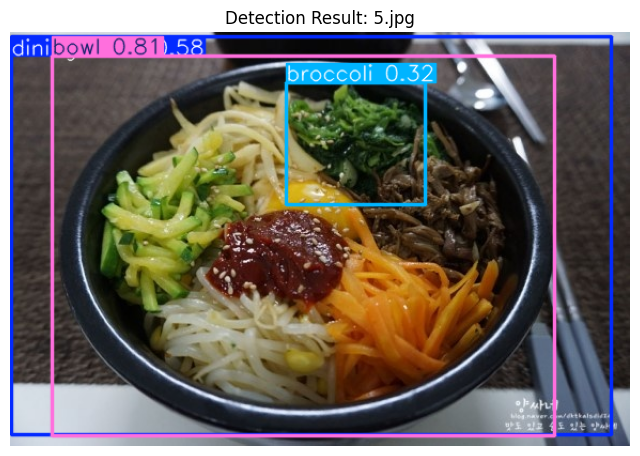

In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import os

# 1. 모델 로드 (경로는 상황에 따라 수정하세요)
model = YOLO('/content/yolov8n.pt')

# 2. 이미지 업로드 창 표시
uploaded = files.upload()

# 3. 업로드된 각 이미지에 대해 탐지 수행
for img_name in uploaded.keys():
    print(f"\n🖼️ 업로드한 파일: {img_name}")

    # 4. 탐지 실행
    results = model(img_name)

    # 5. 탐지 클래스 출력
    detected = {}
    for result in results:
        class_ids = result.boxes.cls.cpu().numpy().astype(int)
        for cid in class_ids:
            cname = model.names[cid]
            detected[cname] = detected.get(cname, 0) + 1

    print(f"🔍 탐지된 클래스 및 개수: {detected}")

    # 6. 시각화
    annotated = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_rgb)
    plt.axis('off')
    plt.title(f'Detection Result: {img_name}')
    plt.show()


Saving 2.jpg to 2.jpg

🖼️ 업로드한 파일: 2.jpg

image 1/1 /content/2.jpg: 448x640 1 carrot, 1 dining table, 8.0ms
Speed: 2.4ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
🔍 탐지된 클래스 및 개수: {'dining table': 1, 'carrot': 1}


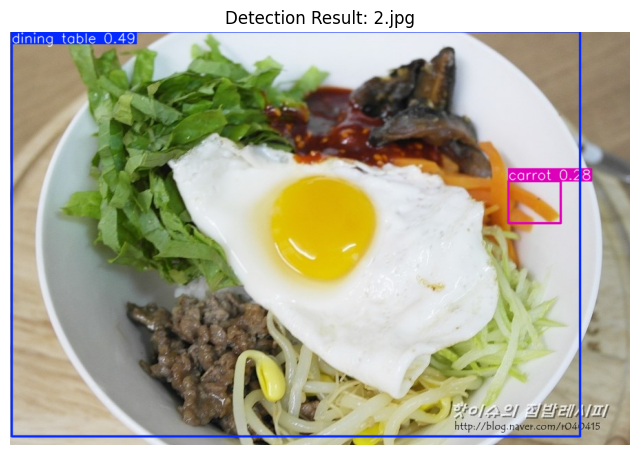

In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import os

# 1. 모델 로드 (경로는 상황에 따라 수정하세요)
model = YOLO('/content/yolov8n.pt')

# 2. 이미지 업로드 창 표시
uploaded = files.upload()

# 3. 업로드된 각 이미지에 대해 탐지 수행
for img_name in uploaded.keys():
    print(f"\n🖼️ 업로드한 파일: {img_name}")

    # 4. 탐지 실행
    results = model(img_name)

    # 5. 탐지 클래스 출력
    detected = {}
    for result in results:
        class_ids = result.boxes.cls.cpu().numpy().astype(int)
        for cid in class_ids:
            cname = model.names[cid]
            detected[cname] = detected.get(cname, 0) + 1

    print(f"🔍 탐지된 클래스 및 개수: {detected}")

    # 6. 시각화
    annotated = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_rgb)
    plt.axis('off')
    plt.title(f'Detection Result: {img_name}')
    plt.show()


Saving 0d4d8ffbf01f71b96d80d7994999a4e11.jpg to 0d4d8ffbf01f71b96d80d7994999a4e11.jpg

🖼️ 업로드한 파일: 0d4d8ffbf01f71b96d80d7994999a4e11.jpg

image 1/1 /content/0d4d8ffbf01f71b96d80d7994999a4e11.jpg: 640x640 1 bowl, 1 pizza, 1 oven, 9.2ms
Speed: 4.1ms preprocess, 9.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
🔍 탐지된 클래스 및 개수: {'pizza': 1, 'bowl': 1, 'oven': 1}


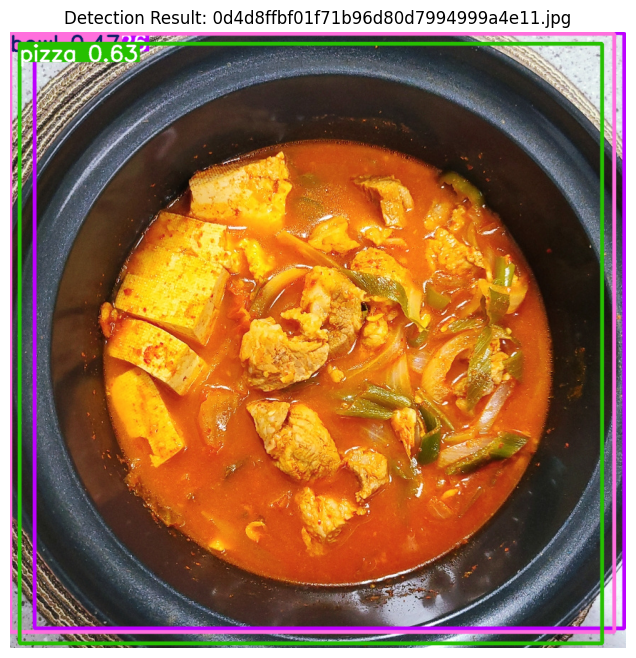

In [7]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import os

# 1. 모델 로드 (경로는 상황에 따라 수정하세요)
model = YOLO('/content/yolov8n.pt')

# 2. 이미지 업로드 창 표시
uploaded = files.upload()

# 3. 업로드된 각 이미지에 대해 탐지 수행
for img_name in uploaded.keys():
    print(f"\n🖼️ 업로드한 파일: {img_name}")

    # 4. 탐지 실행
    results = model(img_name)

    # 5. 탐지 클래스 출력
    detected = {}
    for result in results:
        class_ids = result.boxes.cls.cpu().numpy().astype(int)
        for cid in class_ids:
            cname = model.names[cid]
            detected[cname] = detected.get(cname, 0) + 1

    print(f"🔍 탐지된 클래스 및 개수: {detected}")

    # 6. 시각화
    annotated = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_rgb)
    plt.axis('off')
    plt.title(f'Detection Result: {img_name}')
    plt.show()


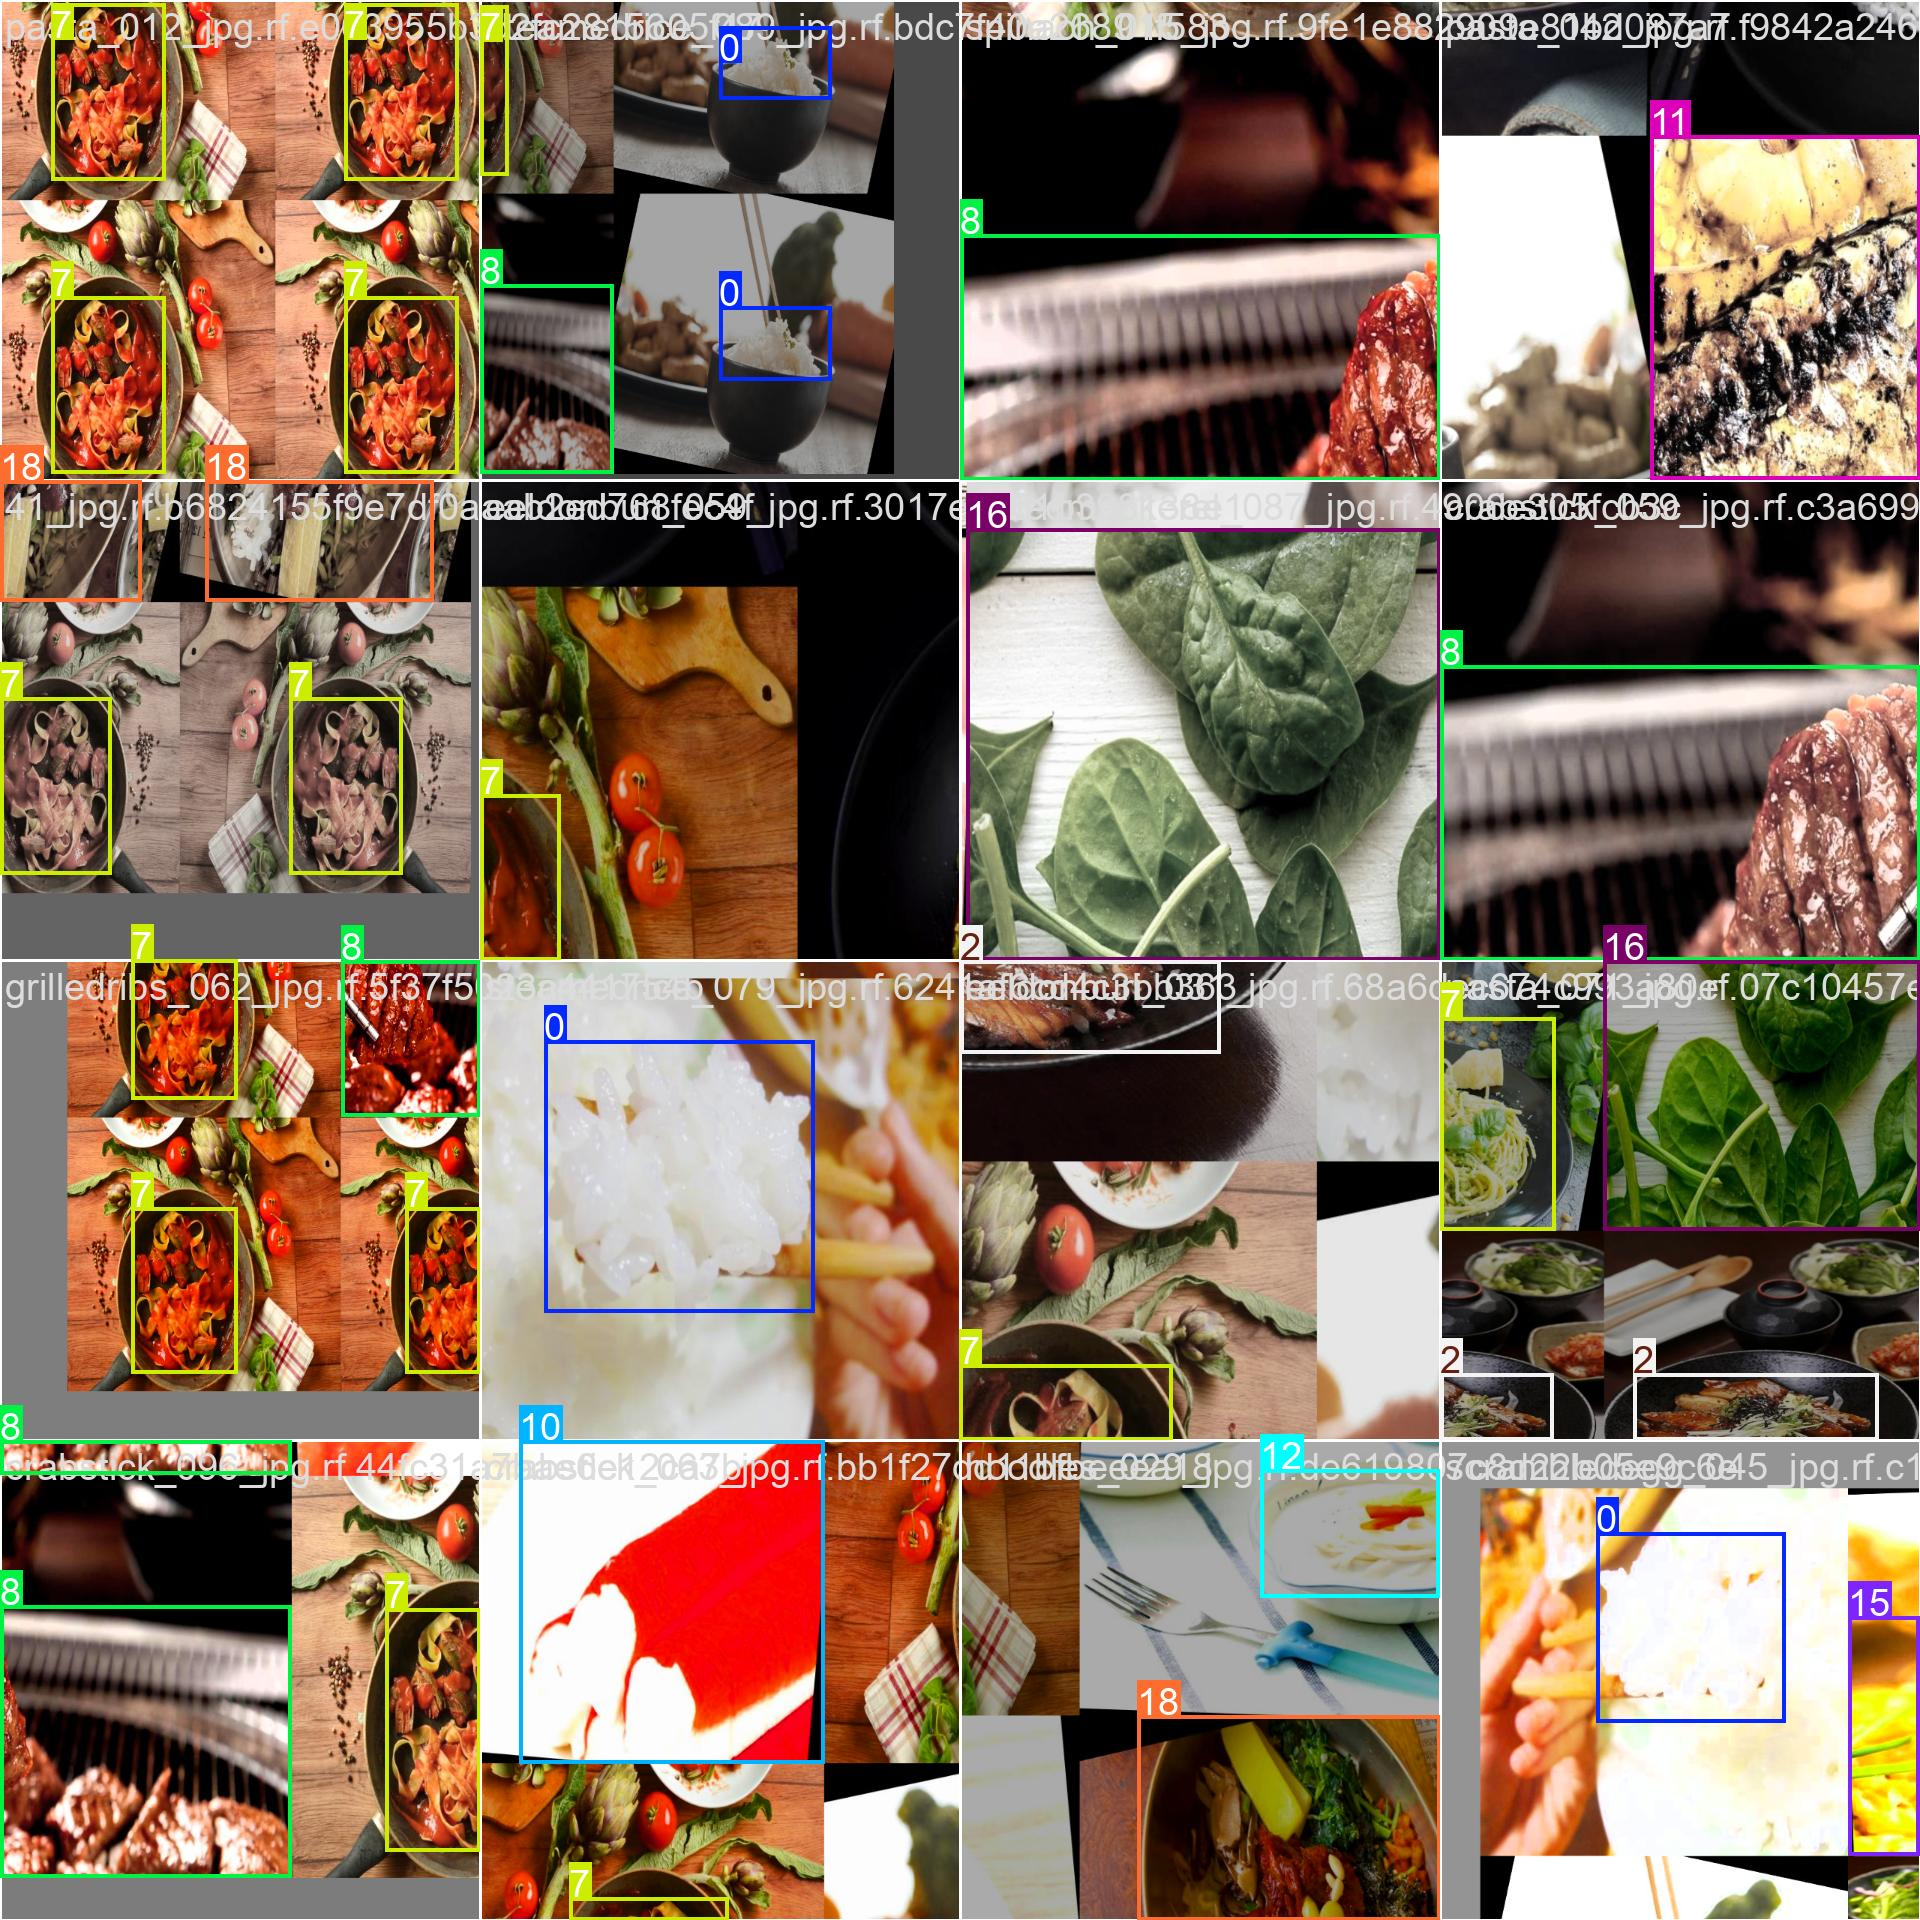